In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [2]:
ti=pd.read_csv(r'D:\Excel sample sheets\titanic passenger list.csv',encoding='unicode escape')

In [3]:
ti.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [4]:
print("No of passengers in titanic ship :"+ str(len(ti.index)))

No of passengers in titanic ship :1309


# Analysing the Data

In [5]:
ti.columns


Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

<Axes: xlabel='survived', ylabel='count'>

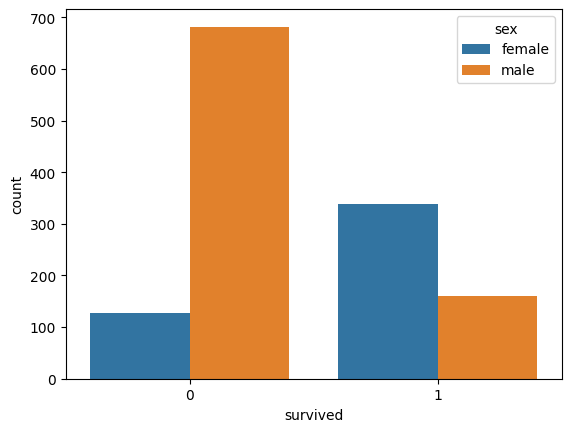

In [6]:
sns.countplot(x='survived',hue = 'sex',data=ti)

<Axes: xlabel='survived', ylabel='count'>

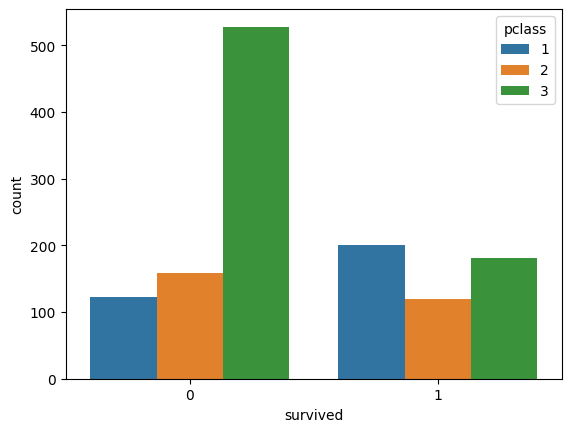

In [7]:
sns.countplot(x='survived',hue='pclass',data =ti)

<Axes: ylabel='Frequency'>

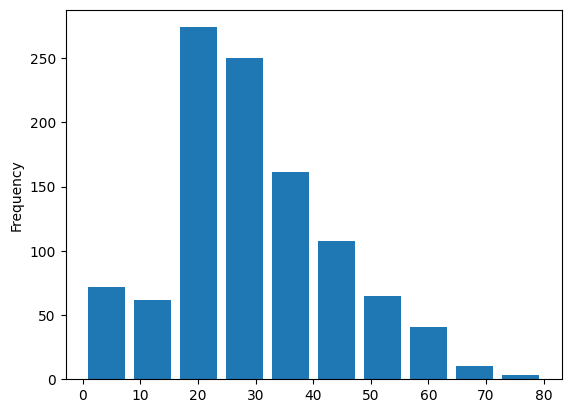

In [8]:
ti['age'].plot.hist(rwidth=0.8)

<Axes: ylabel='Frequency'>

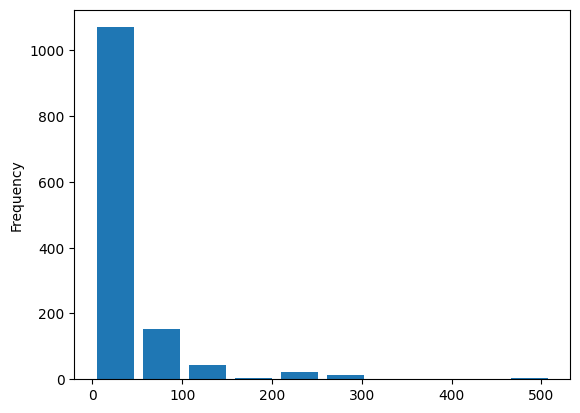

In [9]:
ti['fare'].plot.hist(rwidth=0.8)

In [10]:
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


<Axes: xlabel='sibsp', ylabel='count'>

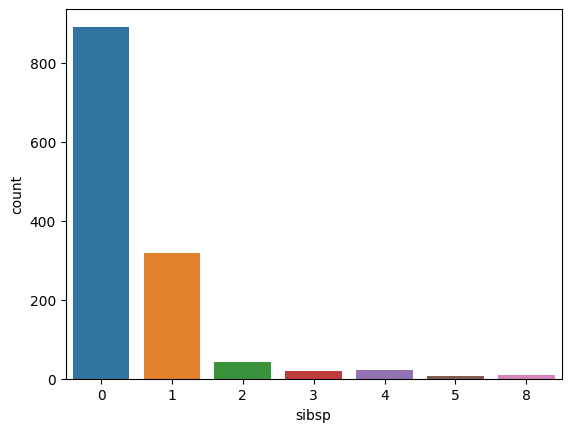

In [11]:
sns.countplot(x='sibsp',data= ti )

# data Wrangling

In [12]:
ti.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True


In [13]:
ti.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [14]:
ti.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<Axes: >

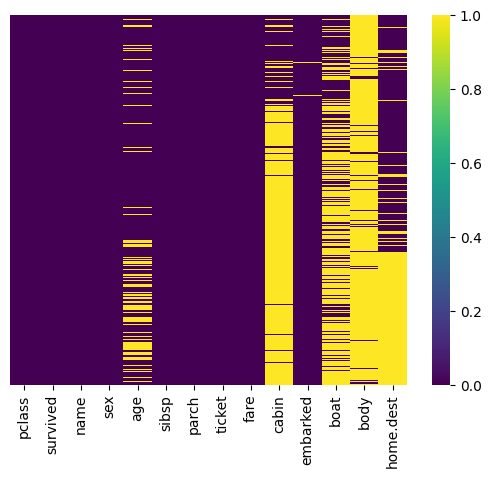

In [15]:
sns.heatmap(ti.isnull(),yticklabels=False,cmap='viridis')

<Axes: xlabel='pclass', ylabel='age'>

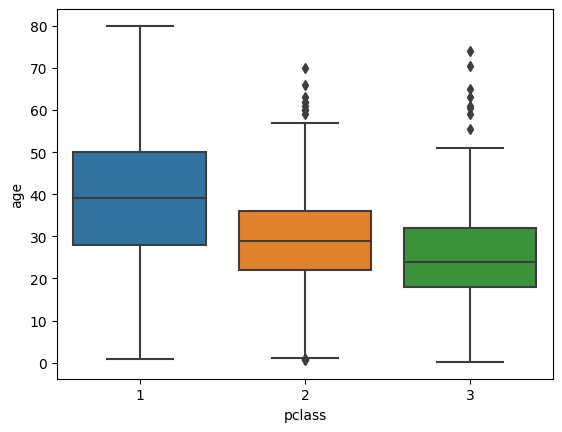

In [16]:
sns.boxplot(x='pclass',y='age',data=ti)

In [17]:
ti.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [18]:
ti.drop('body',axis=1,inplace=True)

In [19]:
ti.dropna(inplace=True)

In [20]:
ti.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,"Bayside, Queens, NY"


<Axes: >

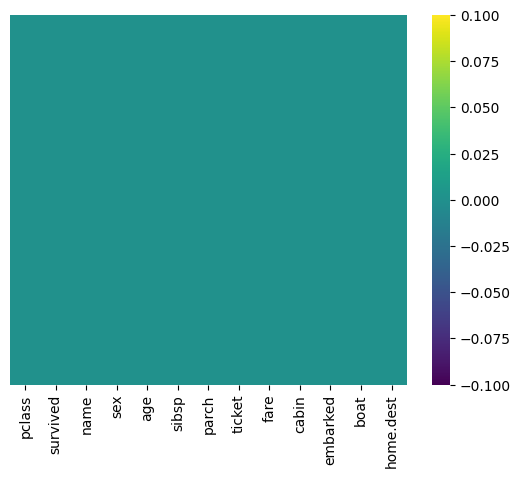

In [21]:
sns.heatmap(ti.isnull(),yticklabels=False,cmap='viridis')

In [22]:
ti.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
home.dest    0
dtype: int64

In [23]:
ti.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,"Bayside, Queens, NY"


In [24]:
sex=pd.get_dummies(ti['sex'],drop_first=True)
sex = sex.replace({False: 0, True: 1})
sex.head(5)

,male
0,0
1,1
5,1
6,0
8,0


In [25]:
embarked=pd.get_dummies(ti['embarked'],drop_first=True)
embarked = embarked.replace({False: 0, True: 1})
embarked.head(5)

,Q,S
0,0,1
1,0,1
5,0,1
6,0,1
8,0,1


In [26]:
pclass=pd.get_dummies(ti['pclass'],drop_first=True)
pclass = pclass.replace({False: 0, True: 1})
pclass.head(5)

,2,3
0,0,0
1,0,0
5,0,0
6,0,0
8,0,0


In [27]:
ti=pd.concat([ti,pclass,sex,embarked],axis=1)

In [28]:
ti.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest,2,3,male,Q,S
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,"St Louis, MO",0,0,0,0,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON",0,0,1,0,1
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,"New York, NY",0,0,1,0,1
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,"Hudson, NY",0,0,0,0,1
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,"Bayside, Queens, NY",0,0,0,0,1


In [29]:

# Drop the 'sex' and 'embarked' columns from the DataFrame 'ti'
ti.drop(['sex','name','home.dest', 'embarked'], axis=1, inplace=True)


In [30]:
ti.drop('cabin',axis=1, inplace =True)

In [31]:
ti.head()

,pclass,survived,age,sibsp,parch,ticket,fare,boat,2,3,male,Q,S
0,1,1,29.00,0,0,24160,211.3375,2,0,0,0,0,1
1,1,1,0.92,1,2,113781,151.5500,11,0,0,1,0,1
5,1,1,48.00,0,0,19952,26.5500,3,0,0,1,0,1
6,1,1,63.00,1,0,13502,77.9583,10,0,0,0,0,1
8,1,1,53.00,2,0,11769,51.4792,D,0,0,0,0,1


# Train Data

In [32]:
X= ti.drop('survived',axis=1)
y=ti['survived'] 


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# use shift + Tab for documentation of train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)

In [35]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [36]:
#for predicting
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Assuming you have X_train, y_train, X_test, and y_test ready


# Apply one-hot encoding to categorical features
encoder = OneHotEncoder(handle_unknown='ignore', categories='auto')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)  # Use transform on X_test

# Create an instance of the LogisticRegression model
logmodel = LogisticRegression()

# Fit the model to the training data
logmodel.fit(X_train_encoded, y_train)

# Make predictions using the trained model
predictions = logmodel.predict(X_test_encoded)


In [37]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [38]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00        48\n\n    accuracy                           1.00        48\n   macro avg       1.00      1.00      1.00        48\nweighted avg       1.00      1.00      1.00        48\n'

In [39]:
confusion_matrix(y_test,predictions)

array([[48]], dtype=int64)

In [40]:
accuracy_score(y_test,predictions)

1.0

# SUV PREDICTIONS

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
suv=pd.read_csv('D:\Excel sample sheets\Suv.csv')

In [43]:
suv.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [44]:
x=suv.iloc[:,[2,3]].values
y=suv.iloc[:,4].values  

In [55]:
str(len(suv.index))

'400'

In [50]:
from sklearn.model_selection import train_test_split

In [53]:
 x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=0)

In [52]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# applying standard scaling to get optimized result
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [57]:
from sklearn.linear_model import LogisticRegression

In [59]:
#classificatrion alg == category is predicted using the data
#classifier is used to classify the data set
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [60]:
y_pred = classifier.predict(x_test)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

89.0